
 (205, 26)

 car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

            car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   

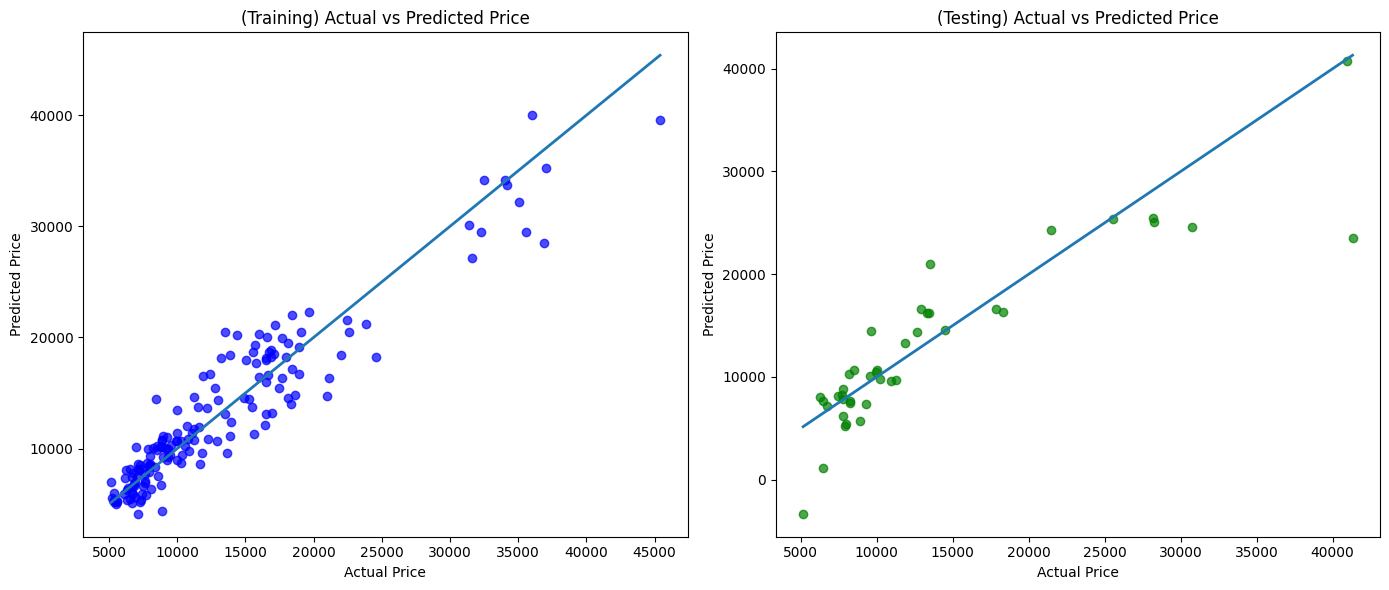

In [9]:
# Task 1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('CarPrice_Assignment.csv')

#EDA
print("\n", data.shape)
print("\n", data.dtypes)
print("\n", data.describe())


# Data Wrangling
data = data.drop(columns=['car_ID', 'CarName'])  # Dropping unnecessary columns

# Encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation Metrics
print("\n")
print("Training Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred)}")
print(f"R-squared: {r2_score(y_train, y_train_pred)}\n")

print("Testing Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred)}")
print(f"R-squared: {r2_score(y_test, y_test_pred)}\n")


# Plotting
plt.figure(figsize=(14, 6))

# Plot Training
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("(Training) Actual vs Predicted Price")

# Plot Testing
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("(Testing) Actual vs Predicted Price")

plt.tight_layout()
plt.show()


In [10]:
# Task 2

df= pd.read_csv('electricity_bill_dataset.csv')

df.head(), data.describe(), data.info()


print("\n", df.head())
print("\n", df.describe())
print("\n", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

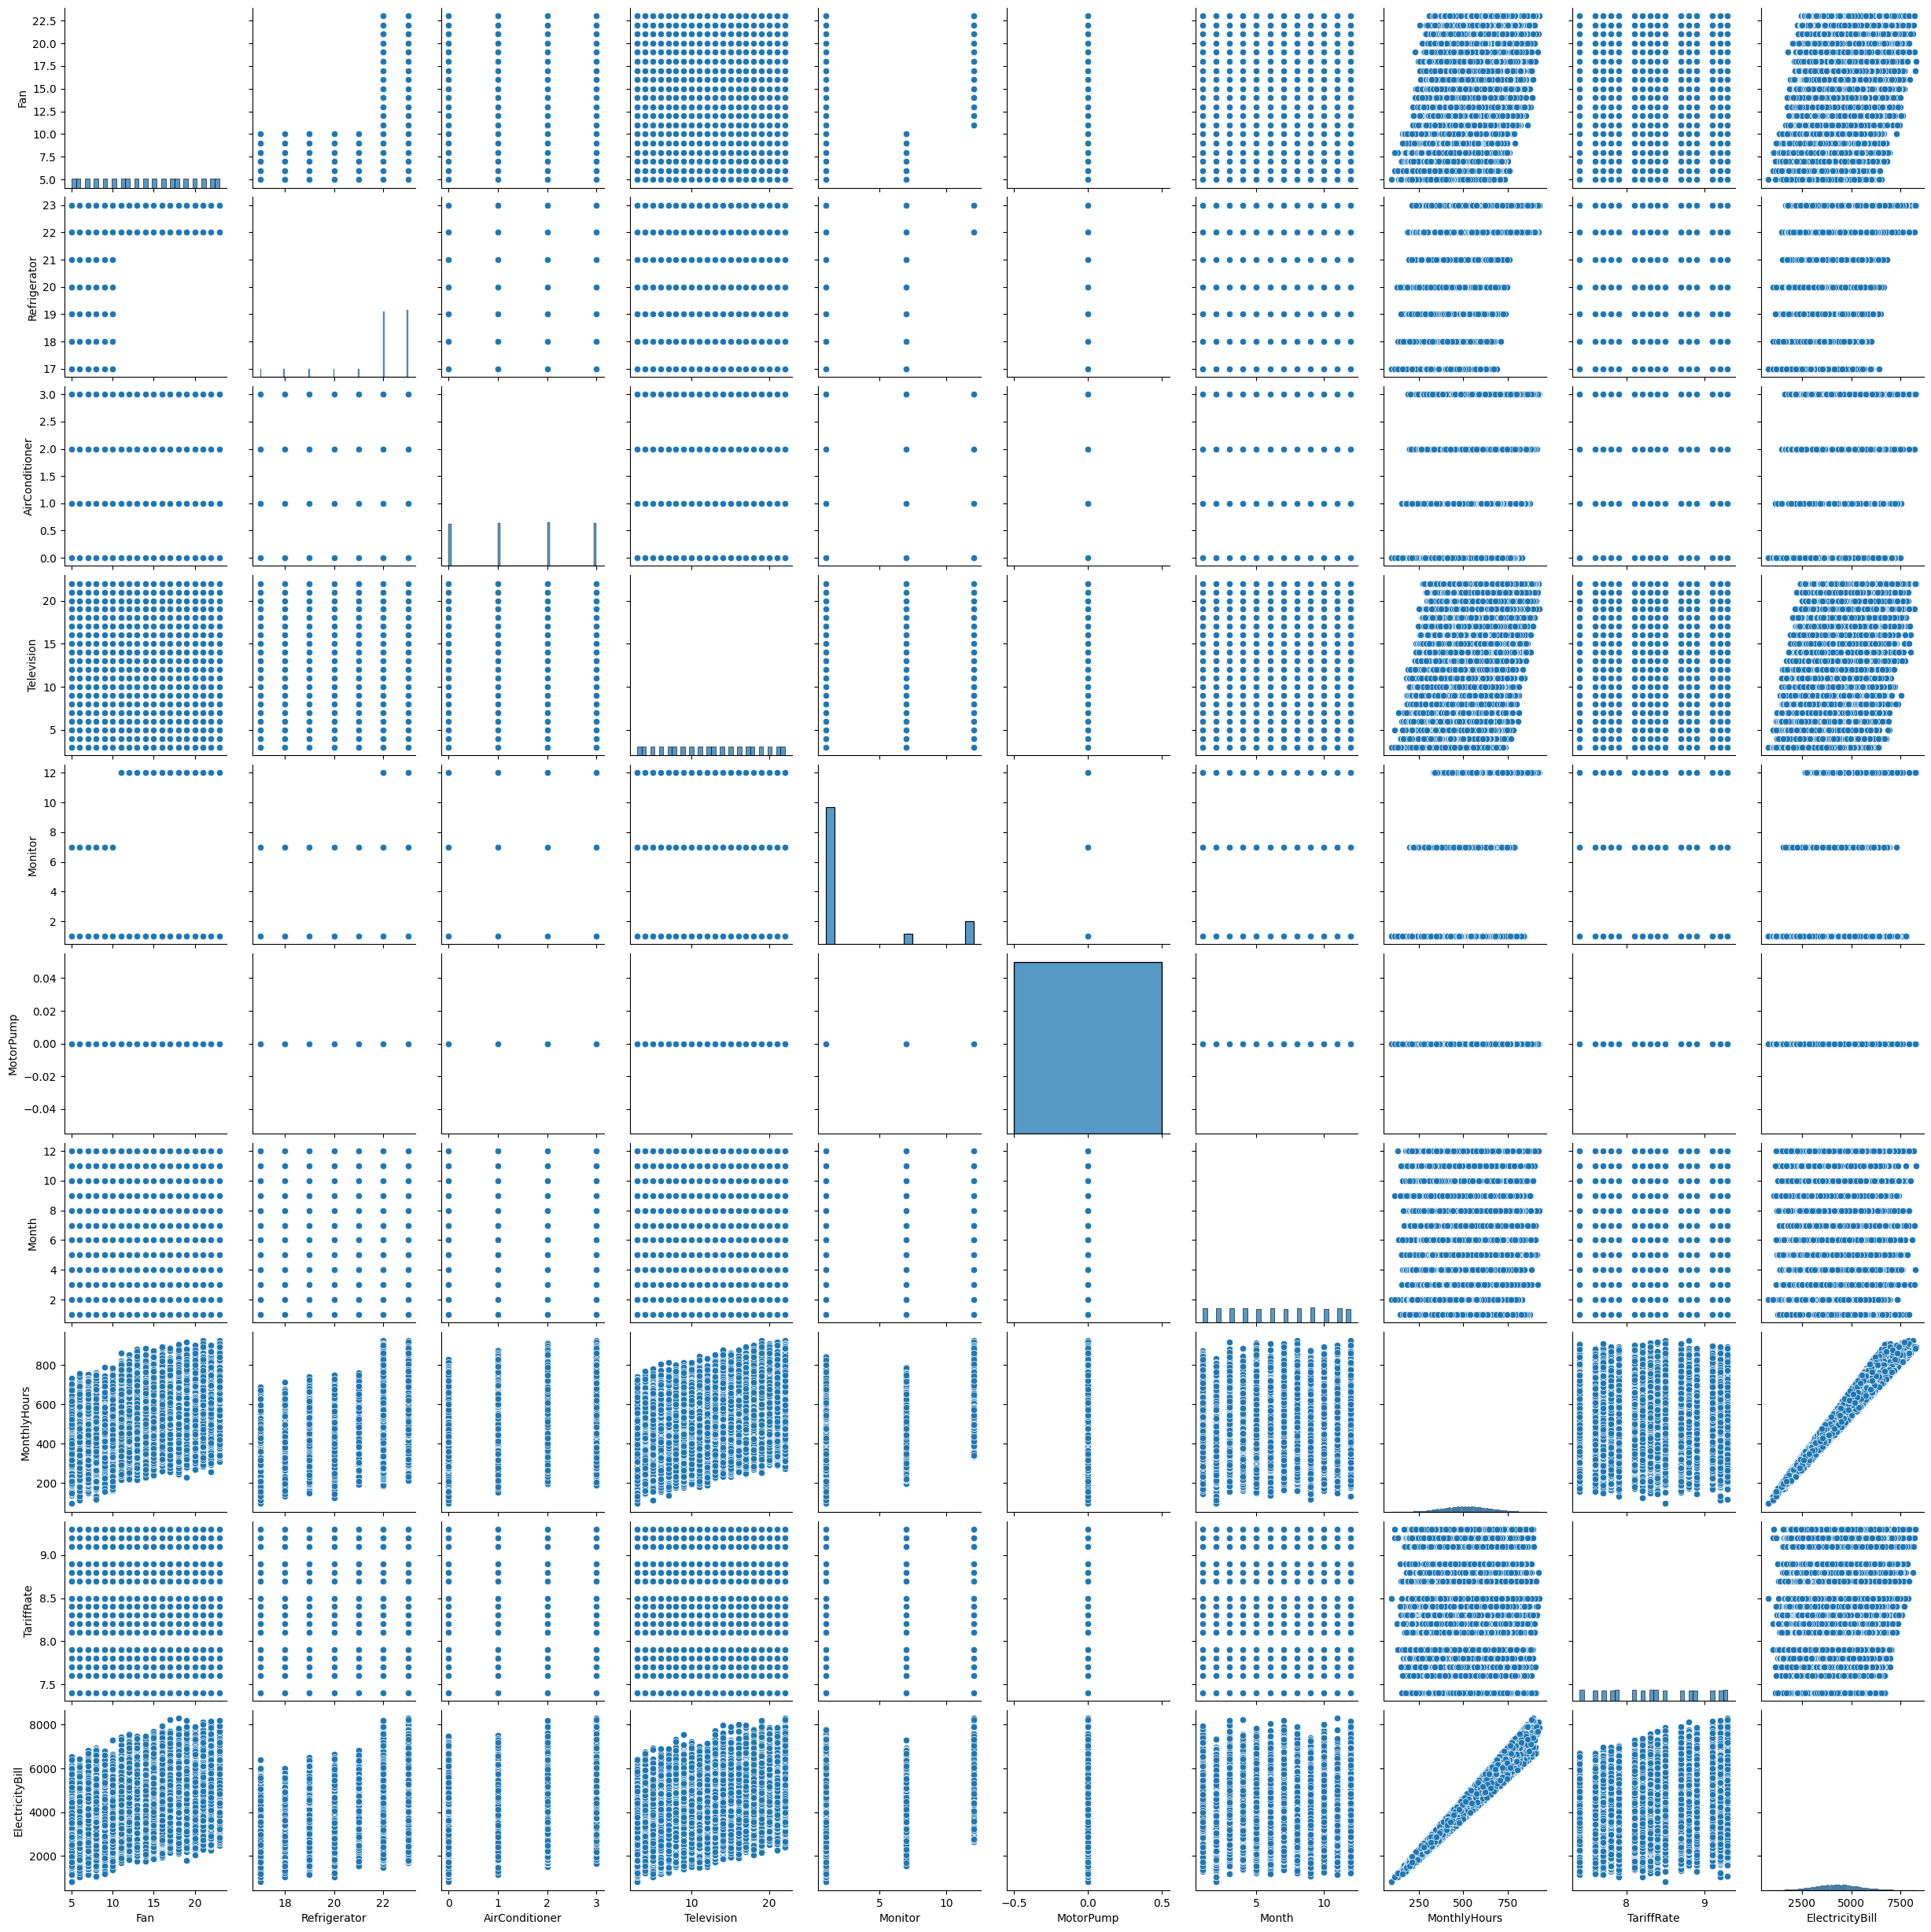

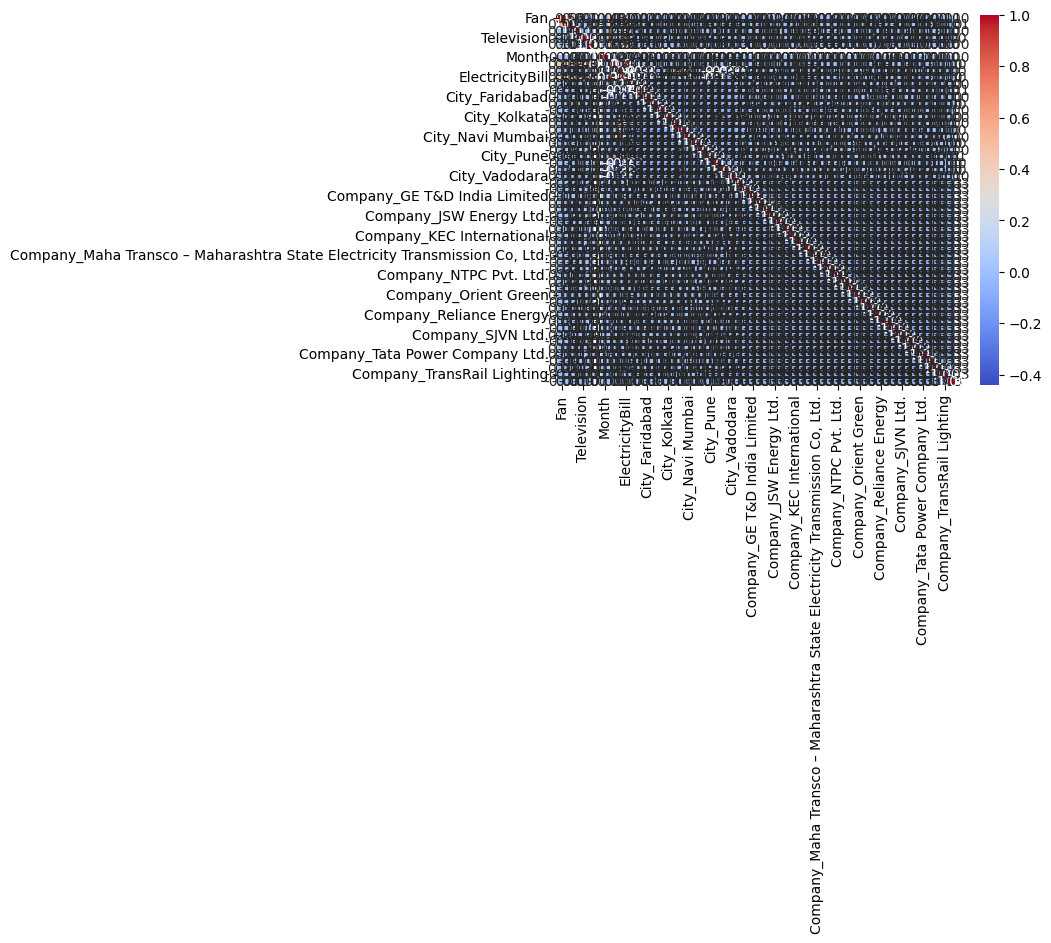

In [11]:
# Check Linearity and multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

df = pd.get_dummies(df, drop_first=True)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",  fmt=".2f")
plt.show()


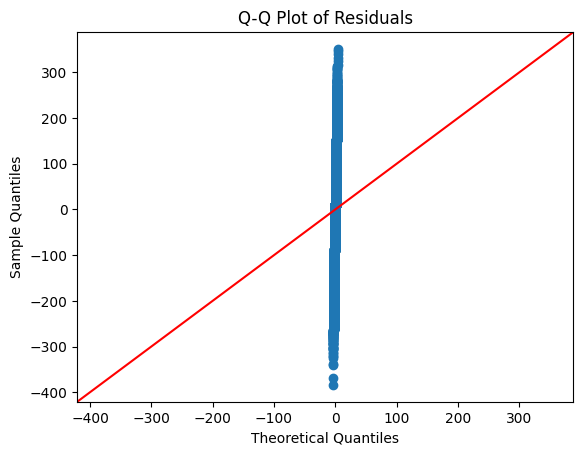

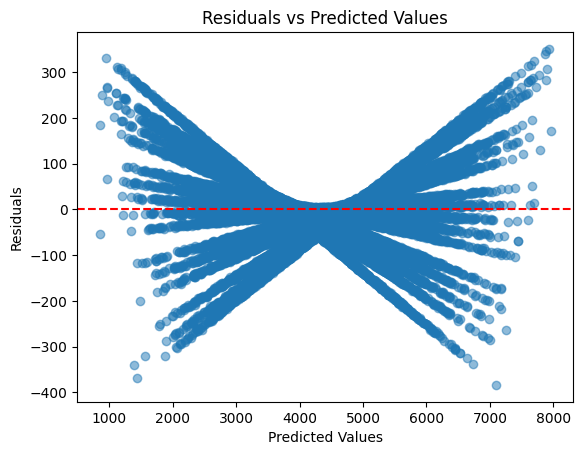

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df.drop(columns=['ElectricityBill'])
y = df['ElectricityBill']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and residuals
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred

# Q-Q Plot for Normality
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Check Homoscedasticity
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [ ]:
# Decision Making and Justification

# Linear regression suits this dataset as it meets key assumptions: 
# the relationships are linear, observations are independent, residuals are evenly spread (homoscedasticity), roughly normal, and Low multicollinearity,
# which supports using linear regression.